In [ ]:
"""
11/23
Purpose: To analyze the fashion dataset using tree based methods

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#!git clone https://github.com/celiibrendan/fashion-mnist.git

In [3]:
from os import sys
sys.path.append("/fashion-mnist/utils/")
sys.path.append("../../../machine_learning_tools/")

In [4]:
import sklearn_models as sklm
import sklearn_utils as sklu
import numpy_ml as nu
import general_utils as gu

# loads the fashion dataset

In [5]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('/fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('/fashion-mnist/data/fashion', kind='t10k')

In [6]:
X_train.shape

(60000, 784)

In [7]:
import numpy as np
np.sqrt(784)

28.0

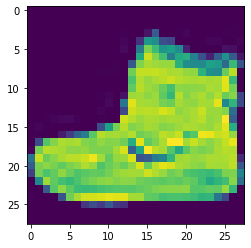

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28,28))

# Part C: Try to Overfit Tree Models

In [9]:
 """
Purpose:  
Hyperparameters. Try to purposefully overfit each of the following approaches: trees, bagging,
AdaBoost, Gradient Boosting, and Random Forests. Were you able to overfit? What hyperparameters 
did you use to overfit these approaches? Plot the training and test error as a function of
some of the hyperparameters for various approaches to show which hyperparameters can lead to
overfitting. You may want to try varying the tree size, number of iterations (Boosting) learning
rate (Boosting), and/or the number of features to consider for each split (Random Forests).

Pseudocode: 
0) Determine feature ideas that can possibly overfit a model (could be multiple for some models):
1) Define base parameters for each model
1) Iterate through all of the models
    2) Iterate through the different features to try
        Iterate through the specific feature value
            1) Train
            2) Get the trainig score
            3) Get the validation score
            4) Store (as dict in dataframe)

Can then plot the the train/test score for different models and different features

"""


'\nPurpose:  \nHyperparameters. Try to purposefully overfit each of the following approaches: trees, bagging,\nAdaBoost, Gradient Boosting, and Random Forests. Were you able to overfit? What hyperparameters \ndid you use to overfit these approaches? Plot the training and test error as a function of\nsome of the hyperparameters for various approaches to show which hyperparameters can lead to\noverfitting. You may want to try varying the tree size, number of iterations (Boosting) learning\nrate (Boosting), and/or the number of features to consider for each split (Random Forests).\n\nPseudocode: \n0) Determine feature ideas that can possibly overfit a model (could be multiple for some models):\n1) Define base parameters for each model\n1) Iterate through all of the models\n   2) Iterate through the different features to try\n       Iterate through the specific feature value\n           1) Train\n           2) Get the trainig score\n           3) Get the validation score\n           4) Sto

# Brainstorming the parameters that can overfit certain models

In [ ]:
"""

sklm.DecisionTreeClassifier,
- max_depth

sklm.BaggingClassifier
- max_depth
- max_features
- max_samples

sklm.RandomForestClassifier
- max_depth
- max_features
- max_samples
-  


sklm.AdaBoostClassifier
- learning_rate

sklm.GradientBoostingClassifier
- learning_rate

"""

In [19]:

import numpy as np
max_depth_range = np.logspace(0,3,20).astype('int')
max_features_range = np.linspace(0,1,10)
max_samples_range = np.linspace(0,1,10)
learning_rate_range = np.logspace(-2,1,20)
learning_rate_range

model_parameters = dict(
DecisionTreeClassifier = 
    dict(
    max_depth = max_depth_range
    ),
BaggingClassifier = 
    dict(
    max_depth = max_depth_range,
    max_features = max_features_range,
    max_samples = max_samples_range,
    ),
RandomForestClassifier = 
    dict(
    max_depth = max_depth_range,
    max_features = max_features_range,
    max_samples = max_samples_range,
    ),
AdaBoostClassifier=dict(
    learning_rate = learning_rate_range,
    ), 
GradientBoostingClassifier=dict(
    learning_rate = learning_rate_range,
    ), 

)

model_parameters

{'DecisionTreeClassifier': {'max_depth': array([   1,    1,    2,    2,    4,    6,    8,   12,   18,   26,   37,
           54,   78,  112,  162,  233,  335,  483,  695, 1000])},
 'BaggingClassifier': {'max_depth': array([   1,    1,    2,    2,    4,    6,    8,   12,   18,   26,   37,
           54,   78,  112,  162,  233,  335,  483,  695, 1000]),
  'max_features': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
  'max_samples': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
 'RandomForestClassifier': {'max_depth': array([   1,    1,    2,    2,    4,    6,    8,   12,   18,   26,   37,
           54,   78,  112,  162,  233,  335,  483,  695, 1000]),
  'max_features': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),

In [ ]:
from tqdm.notebook import tqdm
results_df_dict = []
for n_est in tqdm(n_estimators):
    
    #train the models
    clf_bag = sklm.BaggingClassifier(n_estimators = n_est,
                                    **bag_parameters).fit(X_train,y_train)
    clf_forest = sklm.RandomForestClassifier(n_estimators = n_est,
                                    **forest_parameters).fit(X_test,y_test)
    #get the out of bag error
    oob_bag = clf_bag.oob_score_
    oob_forest = clf_forest.oob_score_
    
    #calculate the validation score
    val_bag = sklu.accuracy(clf_bag,X_test,y_test)
    val_forest = sklu.accuracy(clf_forest,X_test,y_test)
    
    #store the results
    results_df_dict+=[dict(
        classifier="Bag",
        n_estimators=n_est,
        score=oob_bag,
        score_type = "oob"),
         dict(
        classifier="Bag",
        n_estimators=n_est,
        score=val_bag,
        score_type = "val"),
    ]
        
    results_df_dict+=[dict(
        classifier="RF",
        n_estimators=n_est,
        score=oob_forest,
        score_type = "oob"),
         dict(
        classifier="RF",
        n_estimators=n_est,
        score=val_forest,
        score_type = "val"),
    ]
    
    

In [ ]:
import pandas as pd
results_df = pd.DataFrame.from_records(results_df_dict)
results_df["clf_type_score_type"] = results_df["classifier"] + "_" + results_df["score_type"]
results_df

# Plotting the Results

In [ ]:
import seaborn as sns
sns.lineplot(data=results_df, x="n_estimators", y="score", hue="clf_type_score_type")